<a href="https://colab.research.google.com/github/l642/mnist_data_classification-using-ANN-and-CNN/blob/main/mnist_data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(len(X_train))

print(len(X_test))


60000
10000


In [ ]:
#data reshaping for ANN
feature_vector_length = 784
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)
input_shape = (feature_vector_length,)
X_train.shape

(60000, 784)

In [ ]:
 #data reshaping for CNN
 img_width, img_height = 28, 28
 X_train = X_train.reshape(X_train.shape[0],  img_width, img_height,1)
X_test = X_test.reshape(X_test.shape[0], img_width, img_height,1)
input_shape = ( img_width, img_height,1,)
X_train.shape

(60000, 28, 28, 1)

In [ ]:
#ANN model building
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

In [ ]:
# Create the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.6037 - accuracy: 0.9161
Epoch 2/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1015 - accuracy: 0.9685
Epoch 3/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0813 - accuracy: 0.9751
Epoch 4/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0726 - accuracy: 0.9773
Epoch 5/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0634 - accuracy: 0.9807
Epoch 6/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0610 - accuracy: 0.9819
Epoch 7/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0537 - accuracy: 0.9843
Epoch 8/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0523 - accuracy: 0.9849
Epoch 9/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0452 - accuracy: 0.9869
Epoch 10/10
1875/1875 [==============================] - 59s 31m

In [ ]:
#Evaluate model
test_results=model.evaluate(X_test,y_test)


313/313 [==============================] - 3s 10ms/step - loss: 0.0427 - accuracy: 0.9876


In [ ]:
#predict the label of test data set
y_predicted=model.predict(X_test)

In [ ]:
#confusion matrix
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 976,    0,    1,    0,    0,    0,    2,    1,    0,    0],
       [   0, 1130,    2,    0,    0,    0,    0,    3,    0,    0],
       [   0,    2, 1016,    0,    0,    0,    0,   11,    3,    0],
       [   0,    0,    0,  999,    0,    5,    0,    2,    4,    0],
       [   0,    0,    0,    0,  979,    0,    1,    0,    1,    1],
       [   2,    0,    0,    5,    0,  882,    2,    0,    1,    0],
       [   6,    2,    0,    0,    9,    9,  930,    0,    2,    0],
       [   0,    2,    1,    1,    2,    0,    0, 1021,    0,    1],
       [   2,    0,    1,    1,    1,    0,    1,    2,  964,    2],
       [   0,    1,    0,    0,   21,    2,    0,    3,    3,  979]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

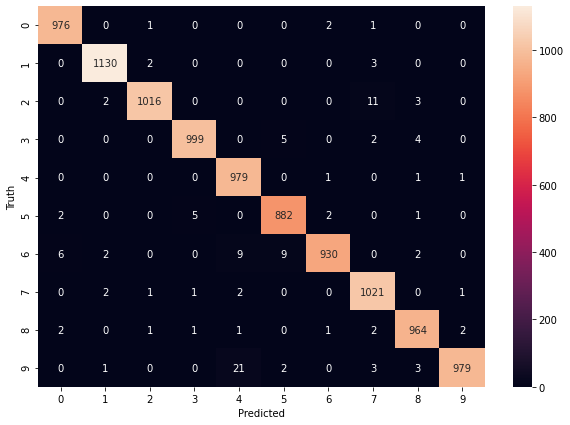

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')